In [1]:
import pymysql
import pandas as pd
import datetime
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Emotion data database
mysql = pymysql.connect(
    host='35.201.169.147',
    user='root',
    password='1thefull!',
    db='silverCare'
)

In [3]:
emotion_df = pd.read_sql_query("SELECT b.SORT,\
                                     a.REGISTRATION_DATE,\
       a.PUDDING_SERIALNUM,\
       CASE IFNULL(EMOTION, '')\
                  WHEN '긍정' THEN 1 * EMOTION_SCORE\
                  WHEN '부정' THEN -1 * EMOTION_SCORE\
                  ELSE 0\
                 END AS emotionScore\
 FROM ROJA_HI_LOG a, PUDDING_SERIALNUM b\
 WHERE a.PUDDING_SERIALNUM = b.PUDDING_SERIALNUM\
  AND a.SEND_SORT = 'asr'\
  AND a.SENDER <> 'ROJA'", mysql)

/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '93.86%'")
  result = self._query(query)
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '62.20%'")
  result = self._query(query)
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '99.61%'")
  result = self._query(query)
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '77.05%'")
  result = self._query(query)
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '92.70%'")
  result = self._query(query)
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '57.42%'")
  result =

In [4]:
# for user in set(busan_emotion_df.PUDDING_SERIALNUM.values):
class investigate_emotion:
    def __init__(self, region):
        self.region = region
        self.region_emotion_df = emotion_df[(emotion_df.SORT == self.region) &\
                                            (emotion_df.REGISTRATION_DATE > datetime.date(2019, 12, 1))]
        self.user_list = list(set(self.region_emotion_df.PUDDING_SERIALNUM))

        
        
    def userEmotionScore(self, user, legend=False):
        # self.region: Gimpo, busanjin, B2C
        user_specific_data = self.region_emotion_df[self.region_emotion_df.PUDDING_SERIALNUM == user]
        user_specific_data['date'] = user_specific_data.REGISTRATION_DATE.map(lambda x: x.date())
        mean_data = user_specific_data.groupby('date').mean()
        std_data = user_specific_data.groupby('date').std()
        mean_data = mean_data[mean_data.index>datetime.datetime(2019, 12, 1).date()]
        std_data = std_data[std_data.index>datetime.datetime(2019, 12, 1).date()]
        plt.plot(mean_data.index, mean_data.emotionScore, 'o-', label=user)
        plt.fill_between(mean_data.index, mean_data.emotionScore-std_data.emotionScore,
                         mean_data.emotionScore+std_data.emotionScore, alpha=0.3)
        plt.xticks(mean_data.index[[int((mean_data.index.__len__()-1)/3*i) for i in range(3)]])
        if legend == True:
            plt.legend()
            
        

    def totalEmotionScore(self, legend=False):
        # self.region: Gimpo, busanjin, B2C
        total_data = self.region_emotion_df
        total_data['date'] = total_data.REGISTRATION_DATE.map(lambda x: x.date())
        mean_data = total_data.groupby('date').mean()
        std_data = total_data.groupby('date').std()
        mean_data = mean_data[mean_data.index>datetime.datetime(2019, 12, 1).date()]
        std_data = std_data[std_data.index>datetime.datetime(2019, 12, 1).date()]
        plt.plot(mean_data.index, mean_data.emotionScore, 'o-')
        plt.fill_between(mean_data.index, mean_data.emotionScore-std_data.emotionScore,
                         mean_data.emotionScore+std_data.emotionScore, alpha=0.3)
        plt.xticks(mean_data.index[[int((mean_data.index.__len__()-1)/3*i) for i in range(3)]])
        if legend == True:
            plt.legend()
        

#     def emotionRatio(self, user): # Calculate the ratio of positive/negative ratio (dismiss emotion score)

        
    def userFrequency(self, user, alpha=None):
        user_specific_data = self.region_emotion_df[self.region_emotion_df.PUDDING_SERIALNUM == user]
        user_specific_data['date'] = user_specific_data.REGISTRATION_DATE.map(lambda x: x.date())
        count_per_date = user_specific_data.groupby('date').count()['REGISTRATION_DATE']
        count_per_date = count_per_date[count_per_date.index>datetime.datetime(2019, 12, 1).date()]
        
        plt.bar(count_per_date.index, count_per_date, alpha=alpha)
        plt.xticks([count_per_date.index[0], count_per_date.index[-1]])
        plt.ylabel("Number of use")
        plt.xlabel("Date")
        
    
    def totalFrequency(self, normalize_by_people=False):
        total_data = self.region_emotion_df
        total_data['date'] = total_data.REGISTRATION_DATE.map(lambda x: x.date())

        count_per_date = total_data.groupby('date').count()['REGISTRATION_DATE']
        count_per_date = count_per_date[count_per_date.index>datetime.datetime(2019, 12, 1).date()]

        if normalize_by_people:
            accumulate_count_df = pd.DataFrame(columns=['date', 'PUDDING_SERIALNUM'],
                               data=[list(i) for i in total_data.groupby(['date', 'PUDDING_SERIALNUM']).count().index.values])
            accumulate_count_df.set_index('date', inplace=True)
            accumulate_count_df = accumulate_count_df[accumulate_count_df.index > datetime.date(2019, 12, 1)]

            all_users = []
            prev_date = accumulate_count_df.index[0]
            accumulate_count = 0
            accumulate_count_list = []
            for count, (idx, row) in enumerate(accumulate_count_df.iterrows()):
                if idx != prev_date:
                    accumulate_count_list.append(accumulate_count)
                    prev_date = idx
                if row.PUDDING_SERIALNUM not in all_users:
                    all_users.append(row.PUDDING_SERIALNUM)
                    accumulate_count += 1
            accumulate_count_list.append(accumulate_count)

            plt.bar(count_per_date.index, count_per_date/np.array(accumulate_count_list))
        else:
            plt.bar(count_per_date.index, count_per_date)
        plt.xticks([count_per_date.index[0], count_per_date.index[-1]])
        plt.ylabel("Number of use")
        plt.xlabel("Date")

# 0. Prelude

Here we use `busanjin` data (You can change `busanjin` to `Gimpo` to get the results of `Gimpo` users).

In [5]:
busanjin_emotion = investigate_emotion('busanjin')

/Users/sewookoh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


# 1. Emotion stat

## 1.1 One user

/Users/sewookoh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


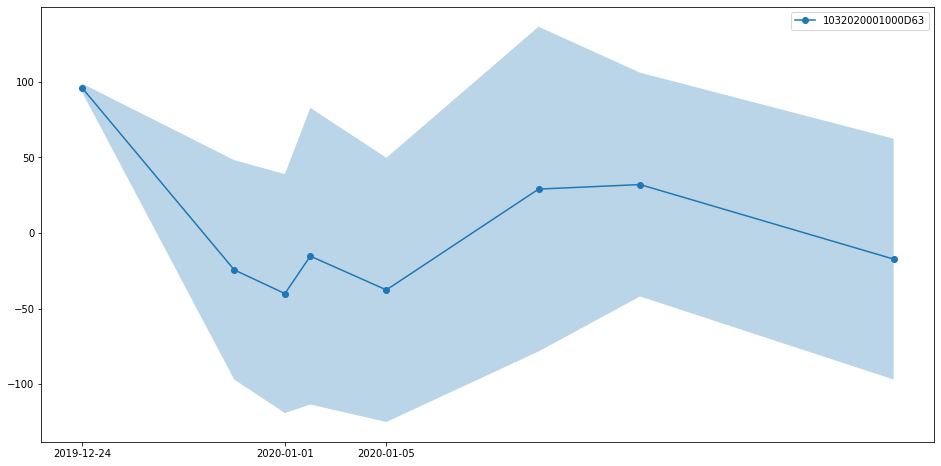

In [6]:
plt.figure(figsize=(16, 8))
random_user_plot = busanjin_emotion.userEmotionScore(rd.choice(busanjin_emotion.user_list), legend=True)

## 1.2 All users (draw all individiual plots)

/Users/sewookoh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


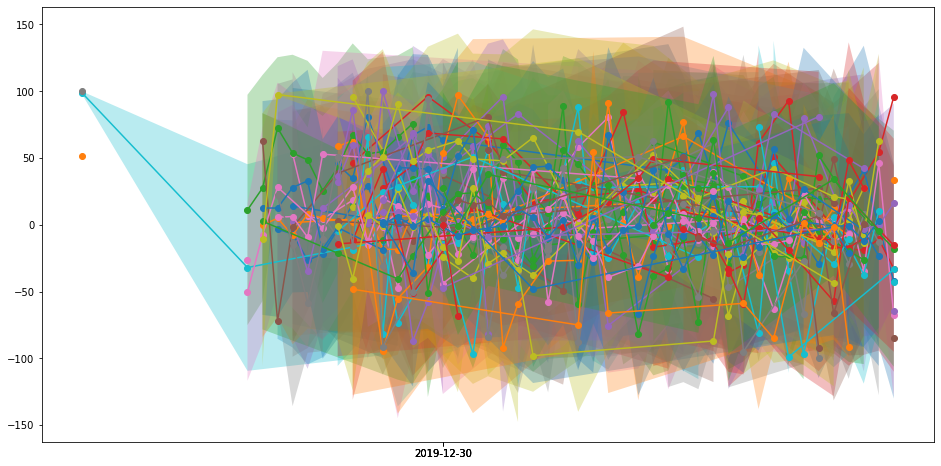

In [7]:
plt.figure(figsize=(16, 8))
for user in busanjin_emotion.user_list:
    random_user_plot = busanjin_emotion.userEmotionScore(user)

## 1.3 All users (aggregate)

/Users/sewookoh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


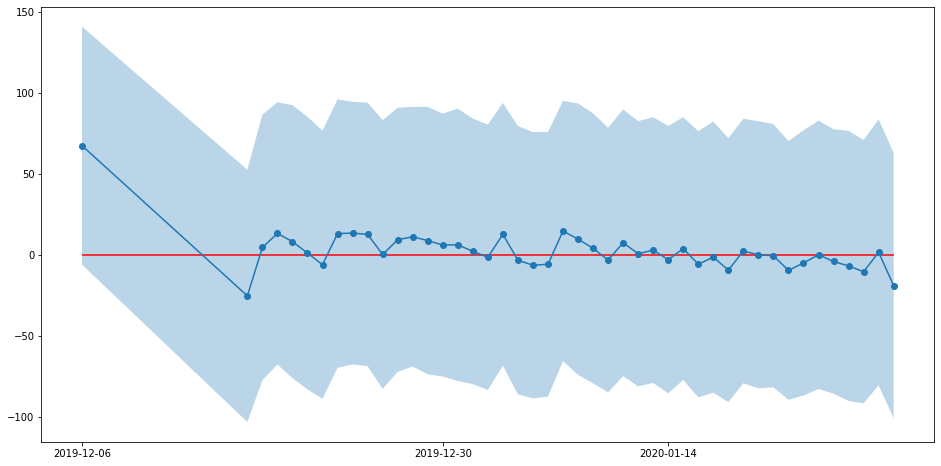

In [8]:
plt.figure(figsize=(16, 8))
busanjin_emotion.totalEmotionScore()
plt.hlines(y=0, xmin=busanjin_emotion.region_emotion_df.date.iloc[0],
         xmax=busanjin_emotion.region_emotion_df.date.iloc[-1], color="red")

# 2. Usage stat

## 2.1 One user

/Users/sewookoh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


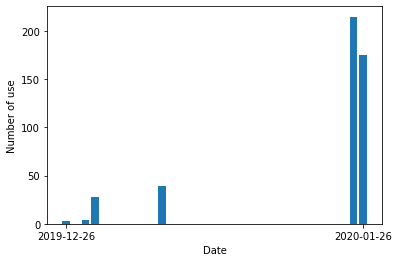

In [9]:
busanjin_emotion.userFrequency(rd.choice(busanjin_emotion.user_list))

## 2.2 All users (all individual plots)

/Users/sewookoh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


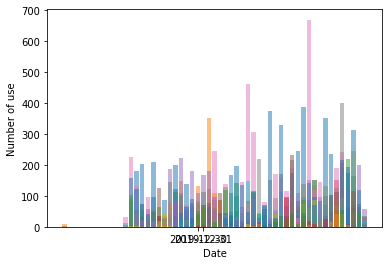

In [10]:
for user in busanjin_emotion.user_list:
    busanjin_emotion.userFrequency(user, alpha=0.5)

## 2.3 All users (accumulate)

/Users/sewookoh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


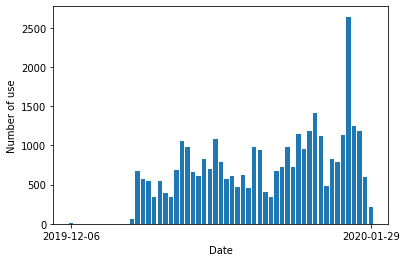

In [11]:
busanjin_emotion.totalFrequency()

## 2.4 All users (normalized by the number of people)

/Users/sewookoh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


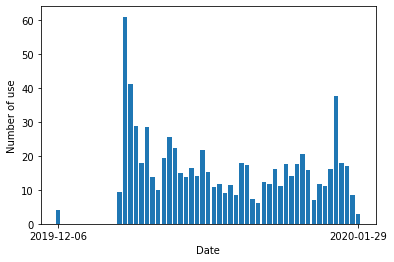

In [12]:
busanjin_emotion.totalFrequency(normalize_by_people=True)